<h2>Lomb-Scargle with Hilbert-Huang transform</h2>

Using **Lomb-Scargle** algorithm with **Empirical Mode Decomposition / Hilbert transform** preprocessing. 

**What do I do here exactly:**

I take the (unevenly sampled) data provided by Hotaka and Lia and process them directly with the **Lomb-Scargle** method (from _gatspy_) as a reference method.

On the other hand, I decompose data with the __Empirical Mode Decomposition__ (from _pyhht_). This gives me a small set of **Intrinsic Mode Functions** - oscillatory, orthogonal components of the input signal. I take first three of those, which is a sort of an adaptive high-pass filtration. Then I take the absolute value and analyze it with Lomb-Scargle. What I would really like to do in the spirit of the HHT is to calculate Hilbert transform absolute value, the **instantaneous amplitude** and analyze that, but it has its problems on an irregularly sampled data, so I just take a module, which is not the worst proxy for a zero mean value signal (possibly I could do better with applying some low-pass filtration after taking the absolute value, but I don't want to do any fine-tuning for this demonstration).


<div style="text-align: right">
_Maciek Wielgus, mwielgus@cfa.harvard.edu, Aug 11th 2017_
</div>

In [1]:
import hhtmw #available from mwielgus@cfa.harvard.edu, posted online
import pyhht.emd as hht #available at http://pyhht.readthedocs.io/
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss
import os
import gatspy

In [146]:
%%capture
path_to_data = '../../hhtpy/data_hotspot_doeleman2009B_and_grmhd_medeiros2017B/data/'
file_list = sorted(os.listdir(path_to_data))
obs = [np.loadtxt(path_to_data+x) for x in file_list]
obFul = [hhtmw.obs(obs[cou],smooth=1., Wmax = 6., 
               file_name = file_list[cou]) for cou in range(96)]

Looking at the examples, preprocessing often helps, sometimes a lot. It often avoids detecting higher harmonics, which is very common in the Fourier / Lomb-Scargle analysis. Below I give just 3 examples with closure phases and one with closure amplitudes, where preprocessing seems to give a clear advantage. Three vertical black lines are the known blob rotation frequency $f_0$(about 60/35 [1/h]) present in the simulation, $f_0/2$ and $2 f_0$.

In [147]:
%%capture
cou =4;  #which datafile to read?
sig = np.abs(obFul[cou].imfs[0,:] + obFul[cou].imfs[1,:]+ obFul[cou].imfs[2,:])

periods, scores, bestF = hhtmw.LombScargle(obFul[cou].t,
                                sig,(0.15,2.))
periods2, scores2, bestF2 = hhtmw.LombScargle(obFul[cou].t,
                                              obFul[cou].signal,(0.15,2.))

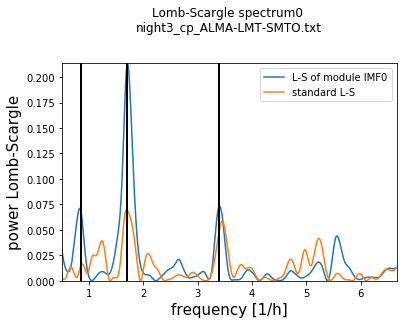

In [129]:
hhtmw.ShowLombScargle2(periods, scores,periods2,scores2,
                       str(imfn), file_name=file_list[cou])

In [148]:
%%capture
cou =16;  #which datafile to read?
sig = np.abs(obFul[cou].imfs[0,:] + obFul[cou].imfs[1,:]+ obFul[cou].imfs[2,:])

periods, scores, bestF = hhtmw.LombScargle(obFul[cou].t,
                                sig,(0.15,2.))
periods2, scores2, bestF2 = hhtmw.LombScargle(obFul[cou].t,
                                              obFul[cou].signal,(0.15,2.))


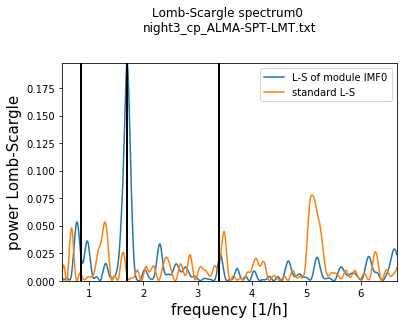

In [131]:
hhtmw.ShowLombScargle2(periods, scores,periods2,scores2,
                       str(imfn), file_name=file_list[cou])

In [149]:
%%capture
cou =38;  #which datafile to read?
sig = np.abs(obFul[cou].imfs[0,:] + obFul[cou].imfs[1,:]+ obFul[cou].imfs[2,:])


periods, scores, bestF = hhtmw.LombScargle(obFul[cou].t,
                                sig,(0.15,2.))
periods2, scores2, bestF2 = hhtmw.LombScargle(obFul[cou].t,
                                              obFul[cou].signal,(0.15,2.))

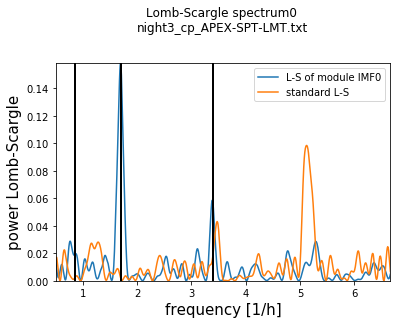

In [141]:
hhtmw.ShowLombScargle2(periods, scores,periods2,scores2,
                       str(imfn), file_name=file_list[cou])

In [150]:
%%capture
cou =62;  #which datafile to read?
sig = np.abs(obFul[cou].imfs[0,:] + obFul[cou].imfs[1,:]+ obFul[cou].imfs[2,:])
periods, scores, bestF = hhtmw.LombScargle(obFul[cou].t,
                                sig,(0.15,2.))
periods2, scores2, bestF2 = hhtmw.LombScargle(obFul[cou].t,
                                              obFul[cou].signal,(0.15,2.))

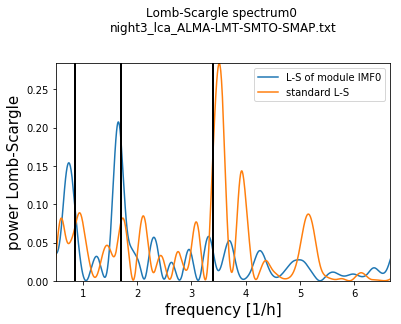

In [143]:
hhtmw.ShowLombScargle2(periods, scores,periods2,scores2,
                       str(imfn), file_name=file_list[cou])

Now to combine these results, I'll just add up the periodograms obtained with each method. I'll use all of the data that can be used, i.e., all triangles/quadrangles that collected data for a sufficiently long period (I assume T > 2h). Of course one may be more fancy and weight data according to snr, but this is just to see whether preprocessing may be important on average and not just ocasionally, as indicated above.

In [151]:
%%capture
cou =0;
sig = np.abs(1.*obFul[cou].imfs[1,:]+1.*obFul[cou].imfs[2,:]+ 1.*obFul[cou].imfs[0,:])
periods, scores, bestF = hhtmw.LombScargle(obFul[cou].t,sig,(0.15,2.))
periods2, scores2, bestF2 = hhtmw.LombScargle(obFul[cou].t,
                                              np.abs(obFul[cou].signal),(0.15,2.))
for cou2 in range(2,97,2):
    try:
        sig = np.abs(1.*obFul[cou2].imfs[2,:]+1.*obFul[cou2].imfs[1,:]+1.*obFul[cou].imfs[0,:])
        periodsLoc, scoresLoc, bestFLoc =hhtmw.LombScargle(obFul[cou2].t,
                               sig,(0.15,2.))
        periods2Loc, scores2Loc, bestF2Loc = hhtmw.LombScargle(obFul[cou2].t,np.abs(obFul[cou2].signal),(0.15,2.))
        scores = scores + scoresLoc
        scores2 = scores2 + scores2Loc
    except (ValueError, IndexError):
        continue

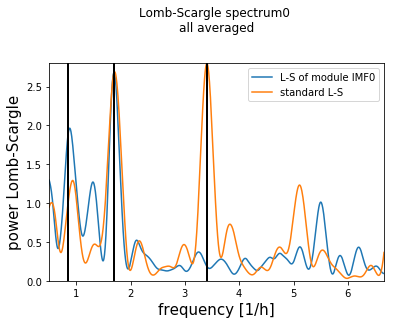

In [145]:
hhtmw.ShowLombScargle2(periods, scores,periods2,scores2,
                       str(imfn), file_name='all averaged')

While the peak at the correct frequency has the same value for both curves, preprocessing results in no detection of the higher harmonics. Half harmonic is present, but it's less significant. Obviously, there is a lot of fine-tuning of the algorithms that could improve results greatly, both on the side of Lomb-Scargle and HHT.

Two more plots about failing. Standard tool of the HHT is a **Hilbert Spectrum**. I calculated it, but it's messy and I can't get a useful information out of it.

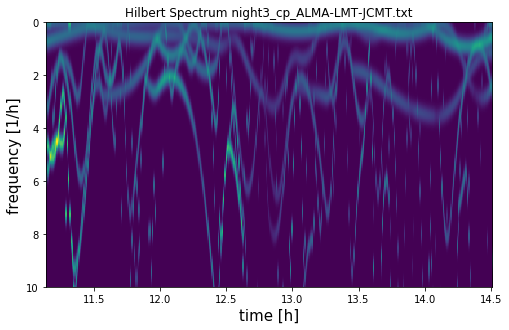

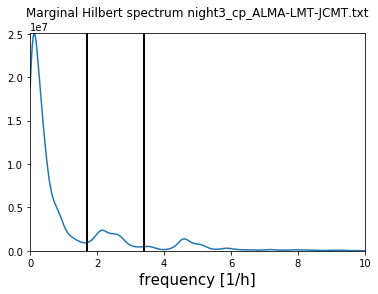

In [1244]:
cou=0
ob2 = hhtmw.obs(obs[cou+1],smooth=1., Wmax = 10., 
               file_name = file_list[cou+1])
ob = hhtmw.obs(obs[cou],smooth=1., Wmax = 10., 
               file_name = file_list[cou])
ob.ShowHSpectr(aspect=0.2)
ob.ShowMargHSpectr()